Chicago 311 Service Request Analysis - Graffiti Removal

We looked at response times for different service requests by Ward, to see if different alderman have been more or less effective at resolving service requests for their constituents. Chicago overhauled their 311 system in January 2019 and a more comprehensive set of data will be available going forward across all 90+ types of service requests received through the system. Prior to 2019, the city made data available on 12 of the more frequent service requests, and each member of our team examined data for a different request. Data available prior to 2011 was spotty, so we included requests made from 2011 to 2018 in our study. We also filtered out any requests that were still open.

Observations from the graffiti requests data set: 

1) The total number of completed graffiti removal requests over this period was 962,142. There was a big disparity in the number of requests per ward, which ranged between 1300 requests on the low end in the 6th ward (Greater Grand Crossing, Englewood, Chatham) and 69,700 on the high end in the 14th ward (Archer Heights, Gage Park). The median number of requests per ward was 15,200. 

2) Graffiti removal requests are generally completed quite quickly. The average time it took to close graffiti removal requests citywide was 2.8 days. Those closed the fastest (< 2 days, on average) included 19 (Bridgeport), 42 (the loop), 2 (near north side, Ukrainian Village, Wicker Park, Lincoln Park), and 12 (McKinely Park, Brighton Park). The 49th ward (Rogers Park) had the longest average response time at 4.3 days, while wards 38 (Portage Park, Dunning), 22 (Little Village, Archer Heights), and 32 (Lincoln Park, Bucktown, Logan Square) also had average response times of 4 days or longer. 

3) We took a look at average household incomes by ward (source: WTTW using DataMade: https://github.com/datamade/ward-demographics#methodology, which used U.S. Census American Community Survey 5-year data) to see if there was a relationship between ward income levels and service request response times. Unlike other service requests we studied, it appeared that there may be a relationship between income levels and response times for graffiti removal. While there are clearly some outliers (low income wards with quick response times, high income wards with slow response times), the scatterplot quadrant with the most number of wards (19) is the below average income/above average response time quadrant (lower right). 

4) For further study, run tests to see if the relationship between income and response times for graffiti removal is statistically significant. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
graffiti_file = "Resources/311_graffiti.csv"
ward_data_file = "Resources/ward_data.csv"

# Read data
graffiti_df = pd.read_csv(graffiti_file)
ward_data_df = pd.read_csv(ward_data_file)

# Display graffiti data
graffiti_df.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
0,01/01/2011,Completed,01/03/2011,11-00001286,Graffiti Removal,Wood - Painted,Garage,1900 W CULLERTON ST,60608.0,1.164016e+06,1.890428e+06,25.0,12.0,31.0,NaN,41.855067,-87.673595,"(41.855067394534714, -87.67359514411345)"
1,01/01/2011,Completed,01/03/2011,11-00001666,Graffiti Removal,Vinyl Siding,Side,444 W 44TH PL,60609.0,1.173856e+06,1.875426e+06,11.0,9.0,61.0,NaN,41.813689,-87.637736,"(41.813689058704064, -87.6377357683662)"
2,01/01/2011,Completed,01/03/2011,11-00001751,Graffiti Removal,Brick - Unpainted,Garage,4759 S KENNETH AVE,60632.0,1.147495e+06,1.872700e+06,23.0,8.0,57.0,NaN,41.805998,-87.734401,"(41.805998271453426, -87.7344008916481)"
3,01/01/2011,Completed,01/03/2011,11-00001870,Graffiti Removal,Brick - Unpainted,Side,3701 S WOLCOTT AVE,60609.0,1.164295e+06,1.880150e+06,11.0,9.0,59.0,NaN,41.826680,-87.672589,"(41.82667996575031, -87.67258908007462)"
4,01/01/2011,Completed,01/03/2011,11-00002200,Graffiti Removal,Wood - Painted,Front,2100 W BARRY AVE,60618.0,1.161810e+06,1.920571e+06,32.0,19.0,5.0,NaN,41.937830,-87.680791,"(41.937830485479466, -87.68079110977904)"


In [2]:
# Display ward data
ward_data_df.head()

,Ward,Alderman,Population Estimate,Mean Household Income,White,Black,Asian,Hispanic or Latino
0,1,Moreno,55705,108482,0.547,0.050,0.040,0.337
1,2,Hopkins,55855,130287,0.731,0.076,0.070,0.099
2,3,Dowell,51207,33968,0.212,0.616,0.104,0.045
3,4,King,53079,93453,0.221,0.610,0.096,0.044
4,5,Hairston,45853,65738,0.225,0.640,0.067,0.040


In [3]:
# Convert dates to datetime
graffiti_df['Creation Date'] = pd.to_datetime(graffiti_df['Creation Date'])
graffiti_df['Completion Date'] = pd.to_datetime(graffiti_df['Completion Date'])

graffiti_df.dtypes

Creation Date                               datetime64[ns]
Status                                              object
Completion Date                             datetime64[ns]
Service Request Number                              object
Type of Service Request                             object
What Type of Surface is the Graffiti on?            object
Where is the Graffiti located?                      object
Street Address                                      object
ZIP Code                                           float64
X Coordinate                                       float64
Y Coordinate                                       float64
Ward                                               float64
Police District                                    float64
Community Area                                     float64
SSA                                                float64
Latitude                                           float64
Longitude                                          float

In [4]:
# Create a dataframe from select columns
graffiti_clean = graffiti_df[["Service Request Number", "Creation Date", "Completion Date", "Status", "Type of Service Request", "ZIP Code", "Ward", "Latitude", "Longitude"]]

# Remove NA rows in Ward
graffiti_clean.dropna(subset = ["Ward"], inplace=True)

# Remove "0" ward rows
graffiti_clean = graffiti_clean[graffiti_clean["Ward"] > 0]

# Filter out requests created before 1/1/2011
graffiti_clean = graffiti_clean[graffiti_clean["Creation Date"] >= "2011-01-01"]
graffiti_clean.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Service Request Number,Creation Date,Completion Date,Status,Type of Service Request,ZIP Code,Ward,Latitude,Longitude
0,11-00001286,2011-01-01,2011-01-03,Completed,Graffiti Removal,60608.0,25.0,41.855067,-87.673595
1,11-00001666,2011-01-01,2011-01-03,Completed,Graffiti Removal,60609.0,11.0,41.813689,-87.637736
2,11-00001751,2011-01-01,2011-01-03,Completed,Graffiti Removal,60632.0,23.0,41.805998,-87.734401
3,11-00001870,2011-01-01,2011-01-03,Completed,Graffiti Removal,60609.0,11.0,41.826680,-87.672589
4,11-00002200,2011-01-01,2011-01-03,Completed,Graffiti Removal,60618.0,32.0,41.937830,-87.680791


In [5]:
# Filter out open service requests
graffiti_completed = graffiti_clean[graffiti_clean["Status"] =="Completed"]

In [6]:
# Format ward column
graffiti_completed["Ward"] = graffiti_completed["Ward"].astype('int64')

graffiti_completed.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Service Request Number,Creation Date,Completion Date,Status,Type of Service Request,ZIP Code,Ward,Latitude,Longitude
0,11-00001286,2011-01-01,2011-01-03,Completed,Graffiti Removal,60608.0,25,41.855067,-87.673595
1,11-00001666,2011-01-01,2011-01-03,Completed,Graffiti Removal,60609.0,11,41.813689,-87.637736
2,11-00001751,2011-01-01,2011-01-03,Completed,Graffiti Removal,60632.0,23,41.805998,-87.734401
3,11-00001870,2011-01-01,2011-01-03,Completed,Graffiti Removal,60609.0,11,41.826680,-87.672589
4,11-00002200,2011-01-01,2011-01-03,Completed,Graffiti Removal,60618.0,32,41.937830,-87.680791


In [7]:
# Add a column calculating Days to Complete
graffiti_completed['Days to Complete'] = (graffiti_completed['Completion Date'] - graffiti_completed['Creation Date']).dt.days

# View dataframe
graffiti_completed.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Service Request Number,Creation Date,Completion Date,Status,Type of Service Request,ZIP Code,Ward,Latitude,Longitude,Days to Complete
0,11-00001286,2011-01-01,2011-01-03,Completed,Graffiti Removal,60608.0,25,41.855067,-87.673595,2
1,11-00001666,2011-01-01,2011-01-03,Completed,Graffiti Removal,60609.0,11,41.813689,-87.637736,2
2,11-00001751,2011-01-01,2011-01-03,Completed,Graffiti Removal,60632.0,23,41.805998,-87.734401,2
3,11-00001870,2011-01-01,2011-01-03,Completed,Graffiti Removal,60609.0,11,41.826680,-87.672589,2
4,11-00002200,2011-01-01,2011-01-03,Completed,Graffiti Removal,60618.0,32,41.937830,-87.680791,2


In [8]:
# Explore days to complete data
graffiti_completed["Days to Complete"].describe()

count    962142.000000
mean          2.840931
std           8.283916
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1019.000000
Name: Days to Complete, dtype: float64

In [9]:
# A large number of requests were completed on the same day. Explore. 
zero_days = graffiti_completed[graffiti_completed["Days to Complete"] == 0]
zero_percent_total = round(zero_days["Days to Complete"].count() / graffiti_completed["Days to Complete"].count() * 100, 1)
total_completed_requests = graffiti_completed["Days to Complete"].count()
beg_date = graffiti_completed["Creation Date"].min()
end_date = graffiti_completed["Creation Date"].max()

print(f'Between {beg_date} and {end_date}:')
print(f'Total number of completed graffiti removal requests: {total_completed_requests}.')
print(f'Number of graffiti removal requests completed on the same day: {zero_days["Days to Complete"].count()}')
print(f'Percent of graffiti removal requests completed on the same day: {zero_percent_total}%')


Between 2011-01-01 00:00:00 and 2018-12-18 00:00:00:
Total number of completed graffiti removal requests: 962142.
Number of graffiti removal requests completed on the same day: 485473
Percent of graffiti removal requests completed on the same day: 50.5%


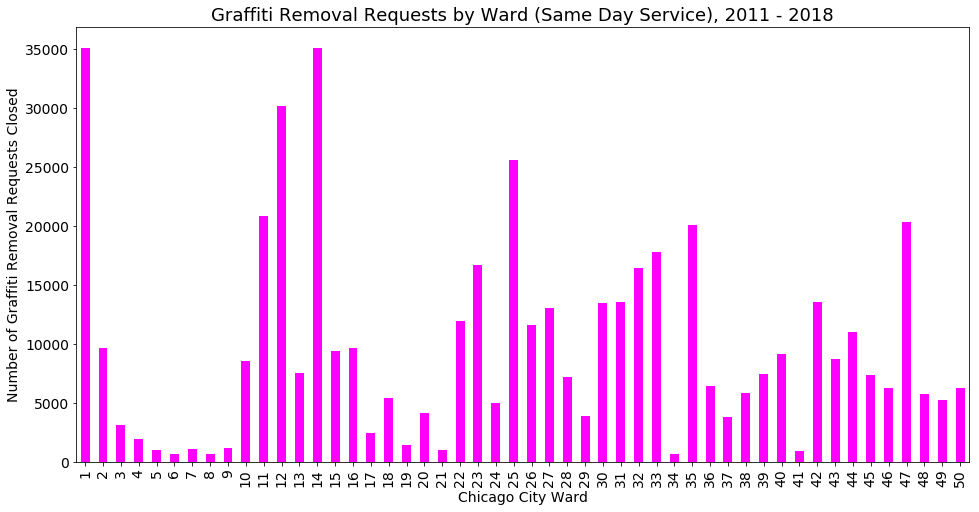

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot a bar chart for number of requests closed in zero days by ward
# Group by ward
zero_group = zero_days.groupby("Ward")

# Count the number of requests by ward
ward_zero_counts = zero_group["Ward"].count()

# Plot in a bar chart
ward_zero_chart = ward_zero_counts.plot(kind='bar', facecolor='magenta', figsize = (16,8), fontsize=14)

# Set the xlabel and ylabel using class methods
ward_zero_chart.set_title("Graffiti Removal Requests by Ward (Same Day Service), 2011 - 2018", fontsize=18)
ward_zero_chart.set_xlabel("Chicago City Ward", fontsize=14)
ward_zero_chart.set_ylabel("Number of Graffiti Removal Requests Closed", fontsize=14)

plt.show()
plt.tight_layout()

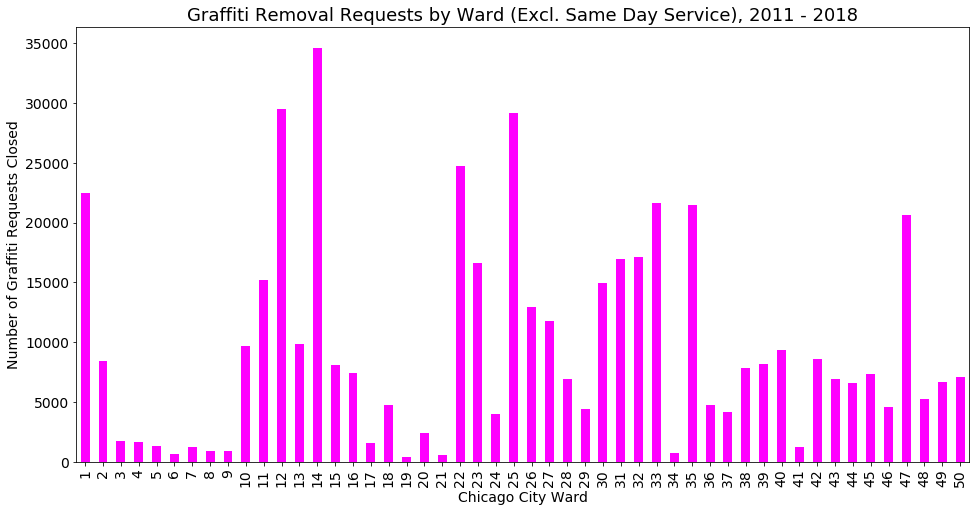

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot a bar chart for number of requests that weren't closed on the same day by ward
# Filter out requests that were closed on the same day
nonzero_days = graffiti_completed[graffiti_completed["Days to Complete"] > 0]

# Group by ward
nonzero_group = nonzero_days.groupby("Ward")

# Count the number of requests by ward
ward_nonzero_counts = nonzero_group["Ward"].count()

# Plot in a bar chart
ward_nonzero_chart = ward_nonzero_counts.plot(kind='bar', facecolor='magenta', figsize = (16,8), fontsize=14)

# Set the xlabel and ylabel using class methods
ward_nonzero_chart.set_title("Graffiti Removal Requests by Ward (Excl. Same Day Service), 2011 - 2018", fontsize=18)
ward_nonzero_chart.set_xlabel("Chicago City Ward", fontsize=14)
ward_nonzero_chart.set_ylabel("Number of Graffiti Requests Closed", fontsize=14)

plt.show()
plt.tight_layout()

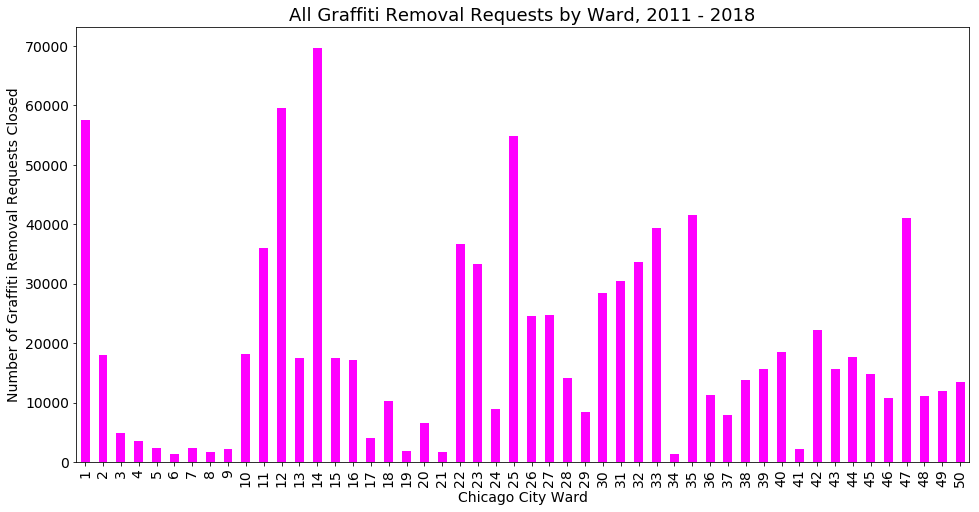

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot total number of requests by ward
# Group by ward
completed_group = graffiti_completed.groupby("Ward")

# Count the number of requests by ward
ward_counts = completed_group["Ward"].count()

# Plot in a bar chart
ward_chart = ward_counts.plot(kind='bar', facecolor='magenta', figsize = (16,8), fontsize=14)

# Set the xlabel and ylabel using class methods
ward_chart.set_title("All Graffiti Removal Requests by Ward, 2011 - 2018", fontsize=18)
ward_chart.set_xlabel("Chicago City Ward", fontsize=14)
ward_chart.set_ylabel("Number of Graffiti Removal Requests Closed", fontsize=14)

# Save figure
plt.savefig("Charts/graffiti_requests.png")

# Show the plot
plt.show()
plt.tight_layout()

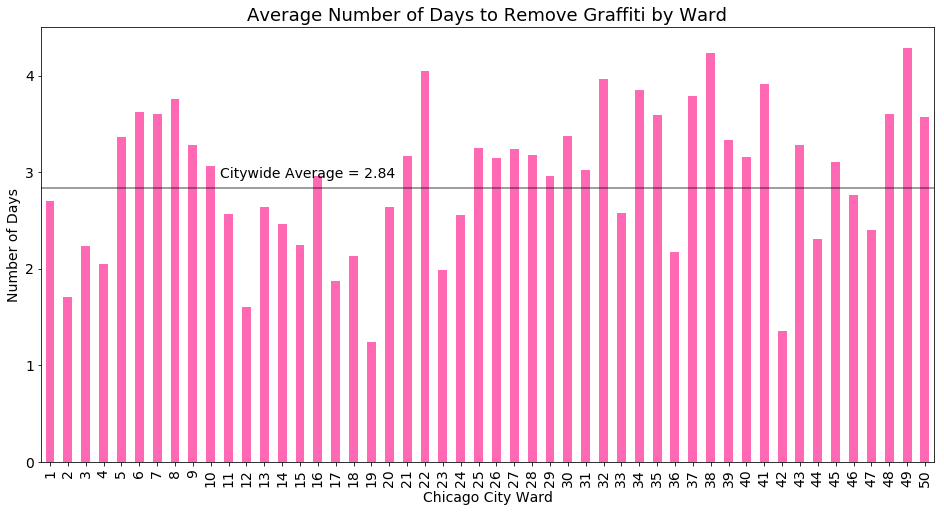

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the average time to close a request by ward 

# Calculate the average time it took to close requests across wards
avg_days_city = round(graffiti_completed["Days to Complete"].mean(), 2)

# Calculate the average time it took to close requests by ward
avg_days_ward = round(completed_group["Days to Complete"].mean(), 2)

# Plot in a bar chart
avg_days_chart = avg_days_ward.plot(kind='bar', facecolor='hotpink', figsize = (16,8), fontsize=14)

# Labels and other formatting
avg_days_chart.set_title("Average Number of Days to Remove Graffiti by Ward", fontsize=18)
avg_days_chart.set_xlabel("Chicago City Ward", fontsize=14)
avg_days_chart.set_ylabel("Number of Days", fontsize=14)
plt.axhline(avg_days_city, color = 'black', alpha = 0.5, label = 'Citywide Average')
plt.text(9.5,(avg_days_city + 0.1), f'Citywide Average = {avg_days_city}', fontsize=14)

# Save figure
plt.savefig("Charts/graffiti_avg_days.png")

# Show the plot
plt.show()
plt.tight_layout()

In [16]:
# Create a data frame from ward group
ward_summary = pd.DataFrame({"Number of Service Requests": ward_counts,
                                    "Average Days to Complete": avg_days_ward})
ward_summary.head()

,Number of Service Requests,Average Days to Complete
Ward,,
1,57596,2.70
2,18072,1.71
3,4919,2.24
4,3593,2.05
5,2378,3.37


In [26]:
# Merge ward summary table with ward data
ward_merge = pd.merge(ward_summary, ward_data_df, on="Ward")
ward_merge_sorted = ward_merge.sort_values("Average Days to Complete", ascending=False)
ward_merge_sorted.reset_index(drop=True)

,Ward,Number of Service Requests,Average Days to Complete,Alderman,Population Estimate,Mean Household Income,White,Black,Asian,Hispanic or Latino
0,49,11939,4.29,Moore,53321,57799,0.414,0.273,0.060,0.217
1,38,13732,4.24,Sposato,58872,78922,0.641,0.017,0.048,0.278
2,22,36714,4.05,Munoz,51640,46760,0.046,0.059,0.004,0.885
3,32,33589,3.97,Waguespack,58091,162593,0.723,0.026,0.048,0.172
4,41,2137,3.91,Napolitano,58195,68887,0.892,0.010,0.042,0.121
5,34,1406,3.85,Austin,49175,56070,0.015,0.949,0.002,0.015
6,37,7978,3.79,Mitts,51916,45522,0.018,0.690,0.004,0.272
7,8,1651,3.76,Harris,47657,49445,0.013,0.964,0.003,0.012
8,6,1333,3.62,Sawyer,48598,43443,0.010,0.959,0.001,0.019
9,48,11023,3.60,Osterman,49517,73574,0.538,0.149,0.125,0.156


In [22]:
median_requests = ward_merge["Number of Service Requests"].median()
median_requests

15201.0

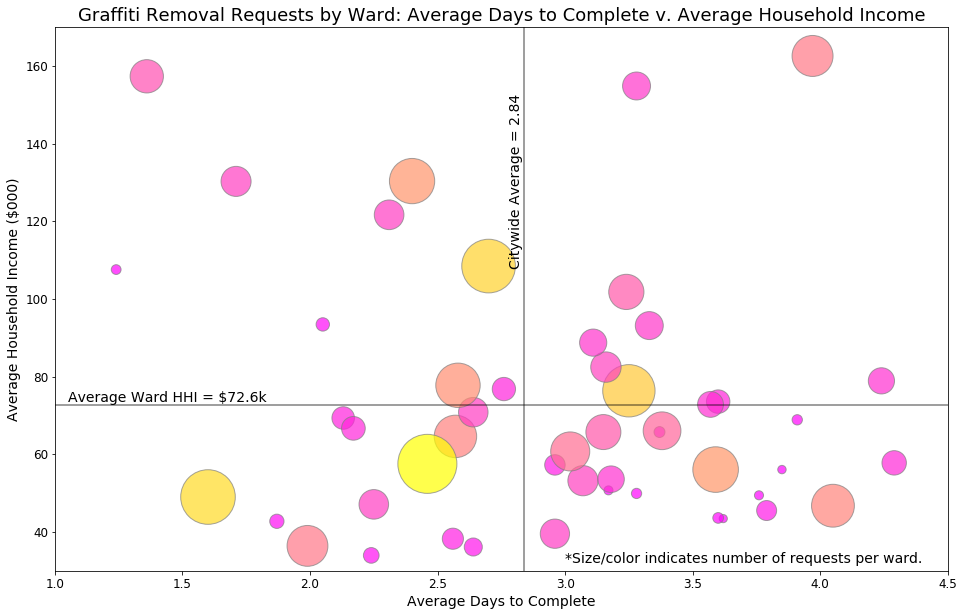

<Figure size 432x288 with 0 Axes>

In [25]:
# Create a scatterplot showing average days to complete v. average household income
x_axis = ward_merge["Average Days to Complete"]
y_axis = ward_merge["Mean Household Income"] / 1000
size = ward_merge["Number of Service Requests"] / 20
color = ward_merge["Number of Service Requests"]

# Calculate the average of mean household income by ward
city_income_mean = round(ward_merge["Mean Household Income"].mean() / 1000, 1)

# plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_axis, s=size, marker="o", c=color, cmap="spring", edgecolors="grey", alpha=0.7)

# Format chart
plt.title("Graffiti Removal Requests by Ward: Average Days to Complete v. Average Household Income", fontsize=18)
plt.xlabel("Average Days to Complete", fontsize=14)
plt.ylabel("Average Household Income ($000)", fontsize=14)
plt.axvline(avg_days_city, color = 'black', alpha = 0.5)
plt.axhline(city_income_mean, color = 'black', alpha = 0.5)
plt.text((avg_days_city - 0.06), 150, f'Citywide Average = {avg_days_city}', rotation=90, fontsize=14)
plt.text(1.05, (city_income_mean + 1), f'Average Ward HHI = ${city_income_mean}k', fontsize=14)
plt.text(3, 32, "*Size/color indicates number of requests per ward.", fontsize=14)
plt.xlim([1, 4.5])
plt.ylim([30, 170])
plt.gcf().set_size_inches((16, 10))
plt.tick_params(axis='both', which='major', labelsize=12)

# Save figure
plt.savefig("Charts/graffiti_income.png")

# Show the plot
plt.show()
plt.tight_layout()